### Student Information
Name:陳煒展

Student ID:1711206015

GitHub ID:Weichan-Chen

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here#####

In [62]:
#載入所需要的套件
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\marsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [63]:
#載入資料並檢視資料
url = "https://raw.githubusercontent.com/leoson-wu/DM2025-Lab1-Exercise/main/newdataset/Reddit-stock-sentiment.csv"

df = pd.read_csv(url)

df.head()


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


In [64]:
df.shape, df.columns.tolist()

((847, 16),
 ['type',
  'datetime',
  'post_id',
  'subreddit',
  'title',
  'author',
  'url',
  'upvotes',
  'downvotes',
  'upvote_ratio',
  'text',
  'subjectivity',
  'polarity',
  'sentiment',
  'entities',
  'label'])

In [65]:
#檢視前10筆資料的title
for t in df["title"][0:10]:
 print(t)

Retardation is on the menu boys! WSB is so back
Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Who knows more? $VMAR
The Trump administration is begging Xi Jinping to call Trump quickly.
Weekend Discussion Thread for the Weekend of April 11, 2025
Is the market in complete denial right now?
Retardation is on the menu boys! WSB is so back
It's fucking awful seeing the "Silver" misinformation campaign everywhere I look
Any cheap stocks under $10?


In [66]:
#檢視前10筆資料的text
for t in df["text"][0:10]:
 print(t)

Calls on retards
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Seeing lots of red in the ticker.
Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.

**Highlight Main Points**

* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.
* The feat highlights the power of electric boating and pushes the limits of innovation.
* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.

**TLDR**

Hold onto your seats – Vision Marine Technologies Inc. and Shaun Torrente have shattered the water-speed re

In [67]:
#選取所需要的欄位
usecols = ["title","text","label"]
X=df[usecols].copy()
X

,title,text,label
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0
...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,1.0
843,$ U.S. dollar value (crashing),Where can I read this?,0.0
844,Analyst Recommendations,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0
845,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,-1.0


In [68]:
#check missing values
X.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [69]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis = 1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [70]:
#check duplicat Data
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
842    False
843    False
844     True
845    False
846    False
Length: 847, dtype: bool

In [71]:
sum(X.duplicated())

23

In [72]:
#處理缺失值
X.drop_duplicates(subset=['title','text'], keep=False, inplace=True)

len(X)

813

label
 0.0    391
-1.0    315
 1.0    107
Name: count, dtype: int64
=------------------


<Axes: title={'center': 'Label distribution'}, xlabel='label'>

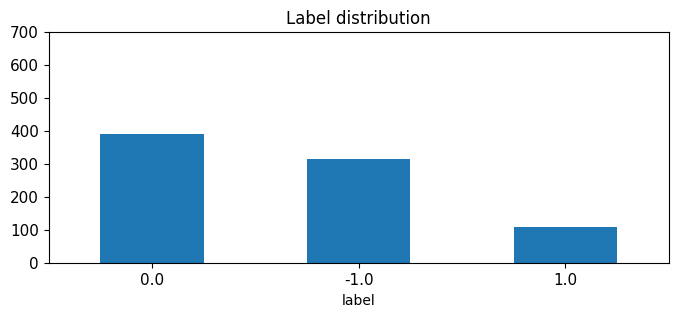

In [73]:
#畫圖

print(X.label.value_counts())


print("=------------------")
X.label.value_counts().plot(kind = 'bar',
                            title = 'Label distribution',
                            ylim = [0, 700],        
                            rot = 0, fontsize = 11, figsize = (8,3))

In [74]:
#將title 與 text 兩欄結合
X['text_all'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
X.head()

,title,text,label,text_all
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,Retardation is on the menu boys! WSB is so bac...
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0,Retail giant TARGET has now declined for 10 co...
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,How do you feel about a sitting president maki...
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,Who knows more? $VMAR Vision Marine Technologi...
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0,The Trump administration is begging Xi Jinping...


In [75]:
X['unigrams'] =X["text_all"].apply(lambda x: dmh.tokenize_text(x))
X[0:5]

,title,text,label,text_all,unigrams
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,Retardation is on the menu boys! WSB is so bac...,"[Retardation, is, on, the, menu, boys, !, WSB,..."
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0,Retail giant TARGET has now declined for 10 co...,"[Retail, giant, TARGET, has, now, declined, fo..."
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,How do you feel about a sitting president maki...,"[How, do, you, feel, about, a, sitting, presid..."
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,Who knows more? $VMAR Vision Marine Technologi...,"[Who, knows, more, ?, $, VMAR, Vision, Marine,..."
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0,The Trump administration is begging Xi Jinping...,"[The, Trump, administration, is, begging, Xi, ..."


In [76]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text_all) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (0, 3335)	1
  (0, 2199)	2
  (0, 2781)	2
  (0, 3957)	1
  (0, 2535)	1
  (0, 631)	1
  (0, 4433)	1
  (0, 3644)	1
  (0, 462)	1
  (0, 719)	1
  (0, 3337)	1


In [77]:
count_vect.get_feature_names_out()[3335]

'retardation'

In [78]:
X_counts.shape

(813, 4474)

In [79]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '04', '06', '08', '10'],
      dtype=object)

In [80]:
X_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [81]:
count_vect.get_feature_names_out()[9:10]

array(['10'], dtype=object)

In [82]:
#把稀疏矩陣轉換成 COO 格式，查找"3"代表哪一個詞
coo = X_counts[0:5, 0:100].tocoo()
for i, j, v in zip(coo.row, coo.col, coo.data):
    if v != 0:
        word = count_vect.get_feature_names_out()[j] 
        print(word)

10
116


In [83]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

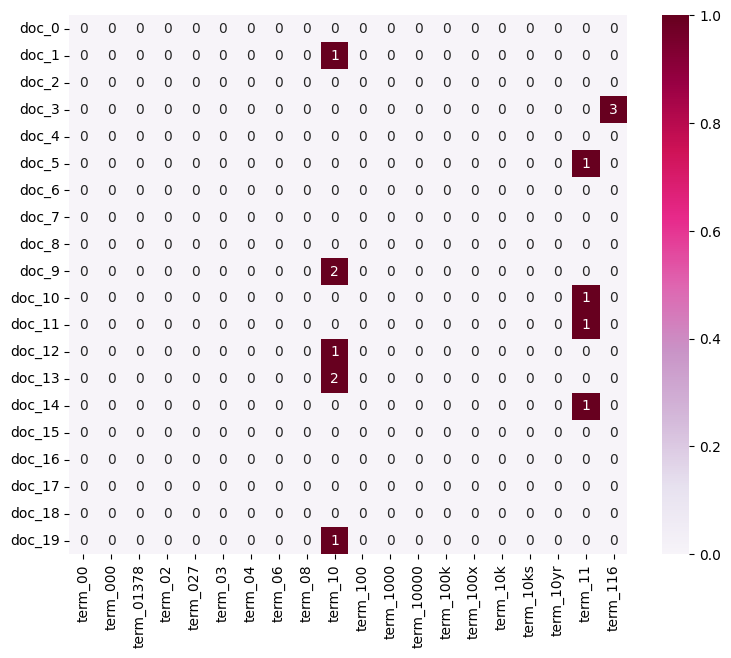

In [84]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

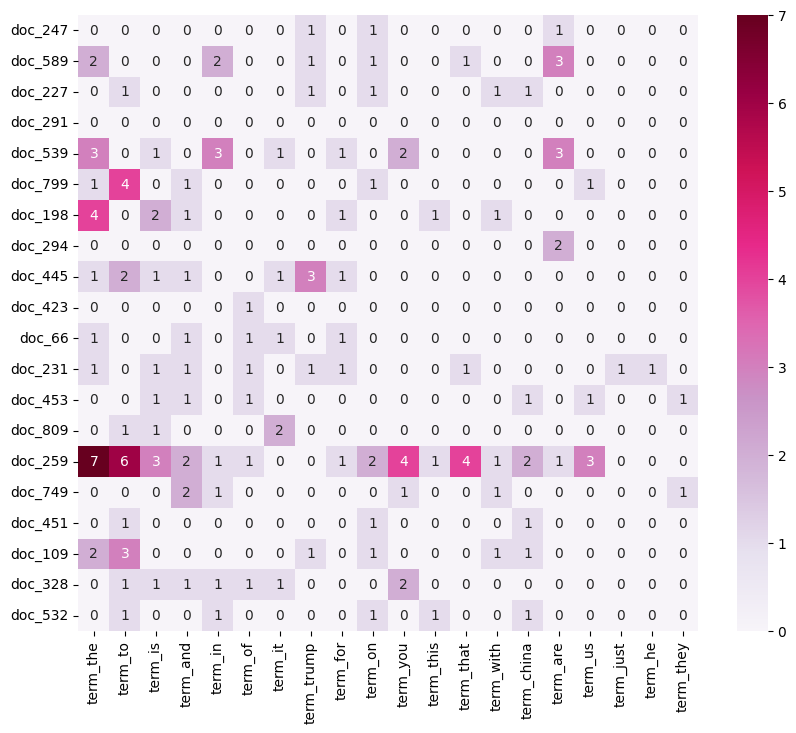

In [25]:
import numpy as np

#排序詞頻最高的 20 個詞
term_frequency = np.asarray(X_counts.sum(axis=0)).ravel()
top_20terms = term_frequency.argsort()[-20:][::-1]

#從 2257 篇文章中隨機抽 20 篇
np.random.seed(42)   
rand_docs = np.random.choice(X_counts.shape[0], 20, replace=False)

# 畫圖
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[top_20terms]]
plot_y = ["doc_"+ str(i) for i in rand_docs]
plot_z = X_counts[rand_docs, :][:, top_20terms].toarray()

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_todraw, 
                 cmap="PuRd",
                 annot=True)

In [26]:
import plotly.express as px
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00
g = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
g.update_layout(
    xaxis=dict(tickangle=90, title="TERMS"),
    yaxis=dict(title="FREQUENCY"),
    title="Exercise 12"
)

In [27]:
top_50 = term_frequencies.argsort()[-50:][::-1]

g = px.bar(x=count_vect.get_feature_names_out()[top_50], y=term_frequencies[top_50])
g.update_layout(
    xaxis=dict(tickangle=90, title="TERMS"),
    yaxis=dict(title="FREQUENCY"),
    title="Exercise 14"
)


In [28]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

term_frequencies_log = np.log1p(term_frequencies)

top_50 = term_frequencies_log.argsort()[-50:][::-1]

g = px.bar(x=count_vect.get_feature_names_out()[top_50], 
           y=term_frequencies_log[top_50])

g.update_layout(
    xaxis=dict(tickangle=90, title="TERMS"),
    yaxis=dict(title="LOG FREQUENCY"),
    title="Exercise 15"
)


# Phase 2

In [29]:
### Begin Assignment Here

In [85]:
X.head()

,title,text,label,text_all,unigrams
0,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,Retardation is on the menu boys! WSB is so bac...,"[Retardation, is, on, the, menu, boys, !, WSB,..."
1,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,0.0,Retail giant TARGET has now declined for 10 co...,"[Retail, giant, TARGET, has, now, declined, fo..."
2,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,How do you feel about a sitting president maki...,"[How, do, you, feel, about, a, sitting, presid..."
3,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,Who knows more? $VMAR Vision Marine Technologi...,"[Who, knows, more, ?, $, VMAR, Vision, Marine,..."
4,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,-1.0,The Trump administration is begging Xi Jinping...,"[The, Trump, administration, is, begging, Xi, ..."


In [86]:
#刪除title與text兩欄，並將text_all改名為text，將label改名為category_name
X = X.drop(columns=['title', 'text'])
X.rename(columns={
    'text_all':  'text',
    'label': 'category_name'
}, inplace=True)

In [33]:
X.head()

,category_name,text,unigrams
0,-1.0,Retardation is on the menu boys! WSB is so bac...,"[Retardation, is, on, the, menu, boys, !, WSB,..."
1,0.0,Retail giant TARGET has now declined for 10 co...,"[Retail, giant, TARGET, has, now, declined, fo..."
2,0.0,How do you feel about a sitting president maki...,"[How, do, you, feel, about, a, sitting, presid..."
3,1.0,Who knows more? $VMAR Vision Marine Technologi...,"[Who, knows, more, ?, $, VMAR, Vision, Marine,..."
4,-1.0,The Trump administration is begging Xi Jinping...,"[The, Trump, administration, is, begging, Xi, ..."


In [87]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['category_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['category_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [88]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category -1.0:


,000,02,03,08,10,100,1000,10000,11,12,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=1 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category 0.0:


,00,000,01378,027,08,10,100,100k,100x,10k,...,you,young,your,yours,yourself,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number=2 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category 1.0:


,04,06,10,100,11,116,12,125,14,145,...,yes,yesterday,yields,yikes,yolo,yoshitsu,you,your,ytd,zero
0,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#總結整個資料夾的內容
print(f"整個資料集一共有{len(X)}篇")
print(f"其中category有 {X['category_name'].unique()}")
print(X.category_name.value_counts())
labels = X['category_name'].unique() 
labels
print("category -1，315篇文章，共2284個詞")
print("category 0，391篇文章，共2851個詞")
print("category 1，107篇文章，共1329個詞")

整個資料集一共有813篇
其中category有 [-1.  0.  1.]
category_name
 0.0    391
-1.0    315
 1.0    107
Name: count, dtype: int64
category -1，315篇文章，共2284個詞
category 0，391篇文章，共2851個詞
category 1，107篇文章，共1329個詞


In [92]:
 # Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])





For category -1.0 we filter the following words:
Bottom 1.0% words: 
labor             1
inner             1
inhibited         1
inherits          1
inherited         1
inheritance       1
infrastructure    1
influence         1
infinity          1
inequality        1
industries        1
indulging         1
individuals       1
individualism     1
indicted          1
india             1
indexes           1
incredibly        1
incredible        1
increasing        1
inside            1
incompetent       1
dtype: int64
Top 5.0% words: 
right        21
crashing     21
re           21
data         21
would        21
           ... 
trump       201
and         222
is          257
to          337
the         560
Length: 114, dtype: int64

For category 0.0 we filter the following words:
Bottom 1.0% words: 
jpn              1
moved            1
mouth            1
mou              1
mots             1
mornings         1
mooning          1
monday           1
momentum         1
moementum        1

In [40]:
!pip3 install PAMI


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: C:\Users\marsh\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [93]:

import pandas as pd
import numpy as np
import builtins, io
from PAMI.extras.convert.DF2DB import DF2DB

_orig_open = builtins.open
def _utf8sig_open(path, mode='r', *args, **kwargs):
   
    if isinstance(path, str) and any(m in mode for m in ('w','a','x')):
        return io.open(path, mode, encoding='utf-8-sig', *args, **kwargs)
    return _orig_open(path, mode, *args, **kwargs)

builtins.open = _utf8sig_open

try:
    # Loop through dict (term_document_dfs)
    for category, df_td in term_document_dfs.items():
        # skip non-DataFrame values
        if not isinstance(df_td, pd.DataFrame):
            print("SKIP (not DataFrame):", category, type(df_td))
            continue

        # 最小安全檔名處理（-1.0 -> label_-1, 0.0 -> label_0, 1.0 -> label_1）
        if pd.isna(category):
            category_safe = 'unknown'
        elif isinstance(category, (float, np.floating, int, np.integer)):
            category_safe = f"label_{int(category)}"
        else:
            category_safe = str(category).replace('.', '_').replace(' ', '_').replace('/', '_')

        out_fname = f"td_freq_db_{category_safe}.csv"

        
        obj = DF2DB(df_td)
        obj.convert2TransactionalDatabase(out_fname, '>=', 1)
        print("WROTE:", out_fname)

finally:
    builtins.open = _orig_open



WROTE: td_freq_db_label_-1.csv
WROTE: td_freq_db_label_0.csv
WROTE: td_freq_db_label_1.csv


Database size (total no of transactions) : 315
Number of items : 2149
Minimum Transaction Size : 1
Average Transaction Size : 16.12063492063492
Maximum Transaction Size : 148
Standard Deviation Transaction Size : 15.101709760557375
Variance in Transaction Sizes : 228.78794864017794
Sparsity : 0.9924985412188763


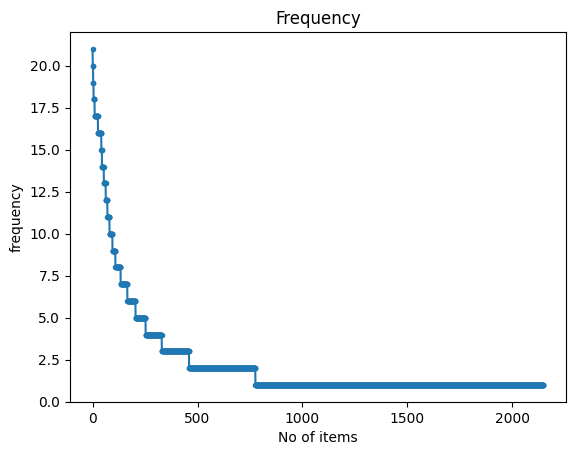

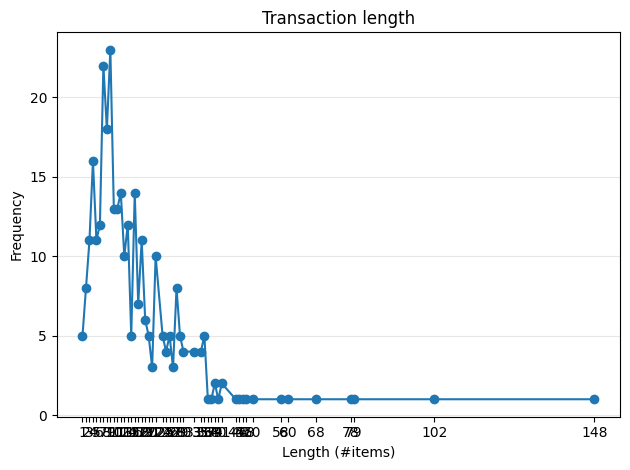

In [96]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_label_-1.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 389
Number of items : 2682
Minimum Transaction Size : 1
Average Transaction Size : 14.259640102827763
Maximum Transaction Size : 209
Standard Deviation Transaction Size : 19.87329895064048
Variance in Transaction Sizes : 395.9659184268412
Sparsity : 0.994683206523927


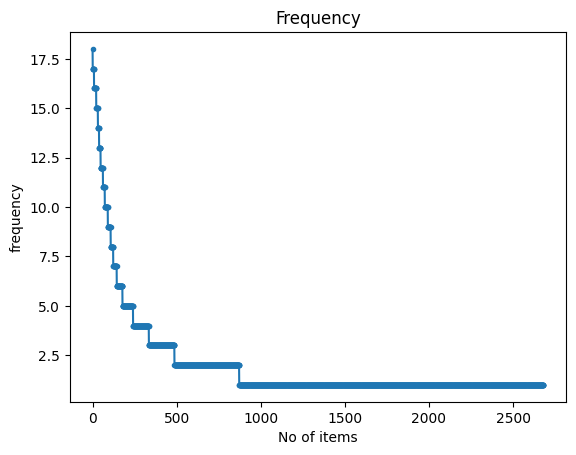

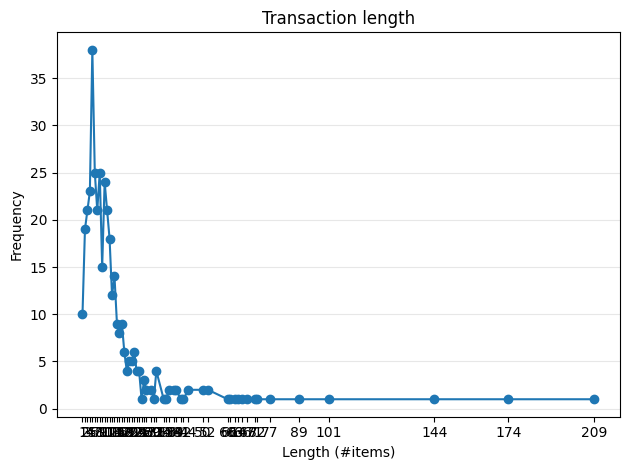

In [97]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_label_0.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 107
Number of items : 1250
Minimum Transaction Size : 2
Average Transaction Size : 19.16822429906542
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.851459894774813
Variance in Transaction Sizes : 286.65067889261155
Sparsity : 0.9846654205607477


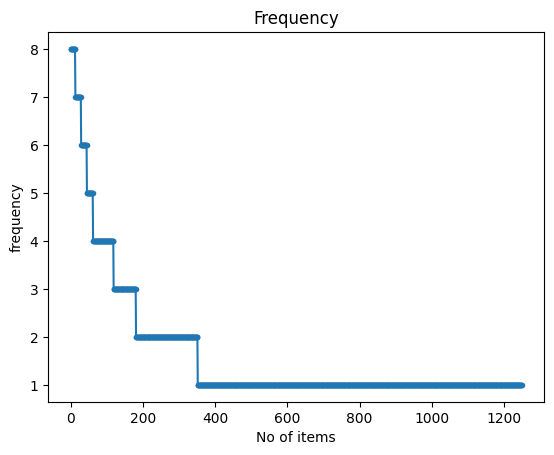

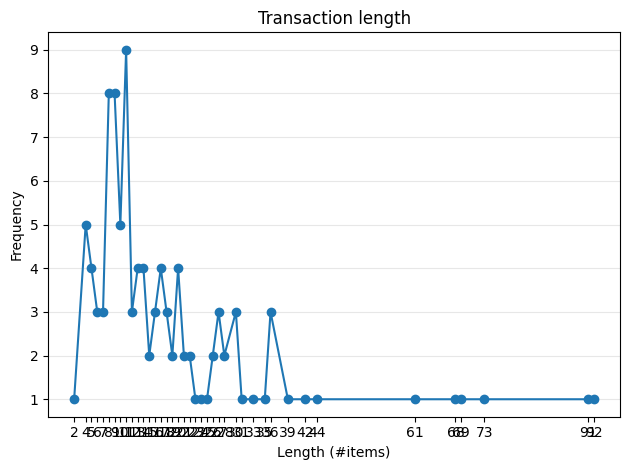

In [98]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_label_1.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [99]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_-1.0.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_negative= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1344
Runtime: 0.010639429092407227


In [100]:
obj1.save('freq_patterns_negative_minSup9.txt') #save the patterns
frequentPatternsDF_negative

,Patterns,Support
0,boys,9
1,boys\twsb,9
2,menu,9
3,menu\twsb,9
4,menu\tboys,9
...,...,...
1339,breaking,19
1340,apr,20
1341,shows,20
1342,dumping\tshows,20


In [101]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj2 = alg.FPGrowth(iFile='td_freq_db_0.0.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 458
Runtime: 0.010639429092407227


In [102]:
obj2.save('freq_patterns_neutral_minSup9.txt') #save the patterns
frequentPatternsDF_neutral

,Patterns,Support
0,deal,9
1,said,9
2,got,9
3,every,9
4,news,9
...,...,...
453,court\tfederal\tsupreme\treserve,16
454,supreme\tcourt,17
455,supreme\tfederal,17
456,court\tsupreme\tfederal,17


In [103]:
from PAMI.frequentPattern.basic import FPGrowth as alg
#因為minSup設定為9，Total No of patterns: 0，故將minSup設定為2
minSup=2
obj3 = alg.FPGrowth(iFile='td_freq_db_1.0.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_positive= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 161
Runtime: 0.010639429092407227


In [104]:
obj3.save('freq_patterns_positive_minSup9.txt') #save the patterns
frequentPatternsDF_positive

,Patterns,Support
0,ll,2
1,new,2
2,years,2
3,awful,2
4,campaign,2
...,...,...
156,daily\tfundamentals\tfriday,2
157,apr\tdaily\tfundamentals\tfriday,2
158,his,2
159,dollar,3


In [105]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_negative, frequentPatternsDF_neutral, frequentPatternsDF_positive]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

                                        Patterns  Support
1212                                     dumping       21
1211                              dumping\tshows       20
1210                                       shows       20
1209                                    breaking       19
1208                                       value       19
...                                          ...      ...
1582     campaign\tfucking\tmisinformation\tlook        2
1581  campaign\teverywhere\tmisinformation\tlook        2
1580        awful\tfucking\tmisinformation\tlook        2
1579     awful\teverywhere\tmisinformation\tlook        2
1546                 awful\teverywhere\tcampaign        2

[1665 rows x 2 columns]
Number of patterns discarded: 298


In [106]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,04,06,08,10,...,campaign\teverywhere\tfucking\tmisinformation\tlook,awful\teverywhere\tfucking\tmisinformation\tlook,awful\tcampaign\tfucking\tmisinformation\tlook,awful\tcampaign\teverywhere\tmisinformation\tlook,everywhere\tfucking\tmisinformation\tlook,campaign\tfucking\tmisinformation\tlook,campaign\teverywhere\tmisinformation\tlook,awful\tfucking\tmisinformation\tlook,awful\teverywhere\tmisinformation\tlook,awful\teverywhere\tcampaign
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


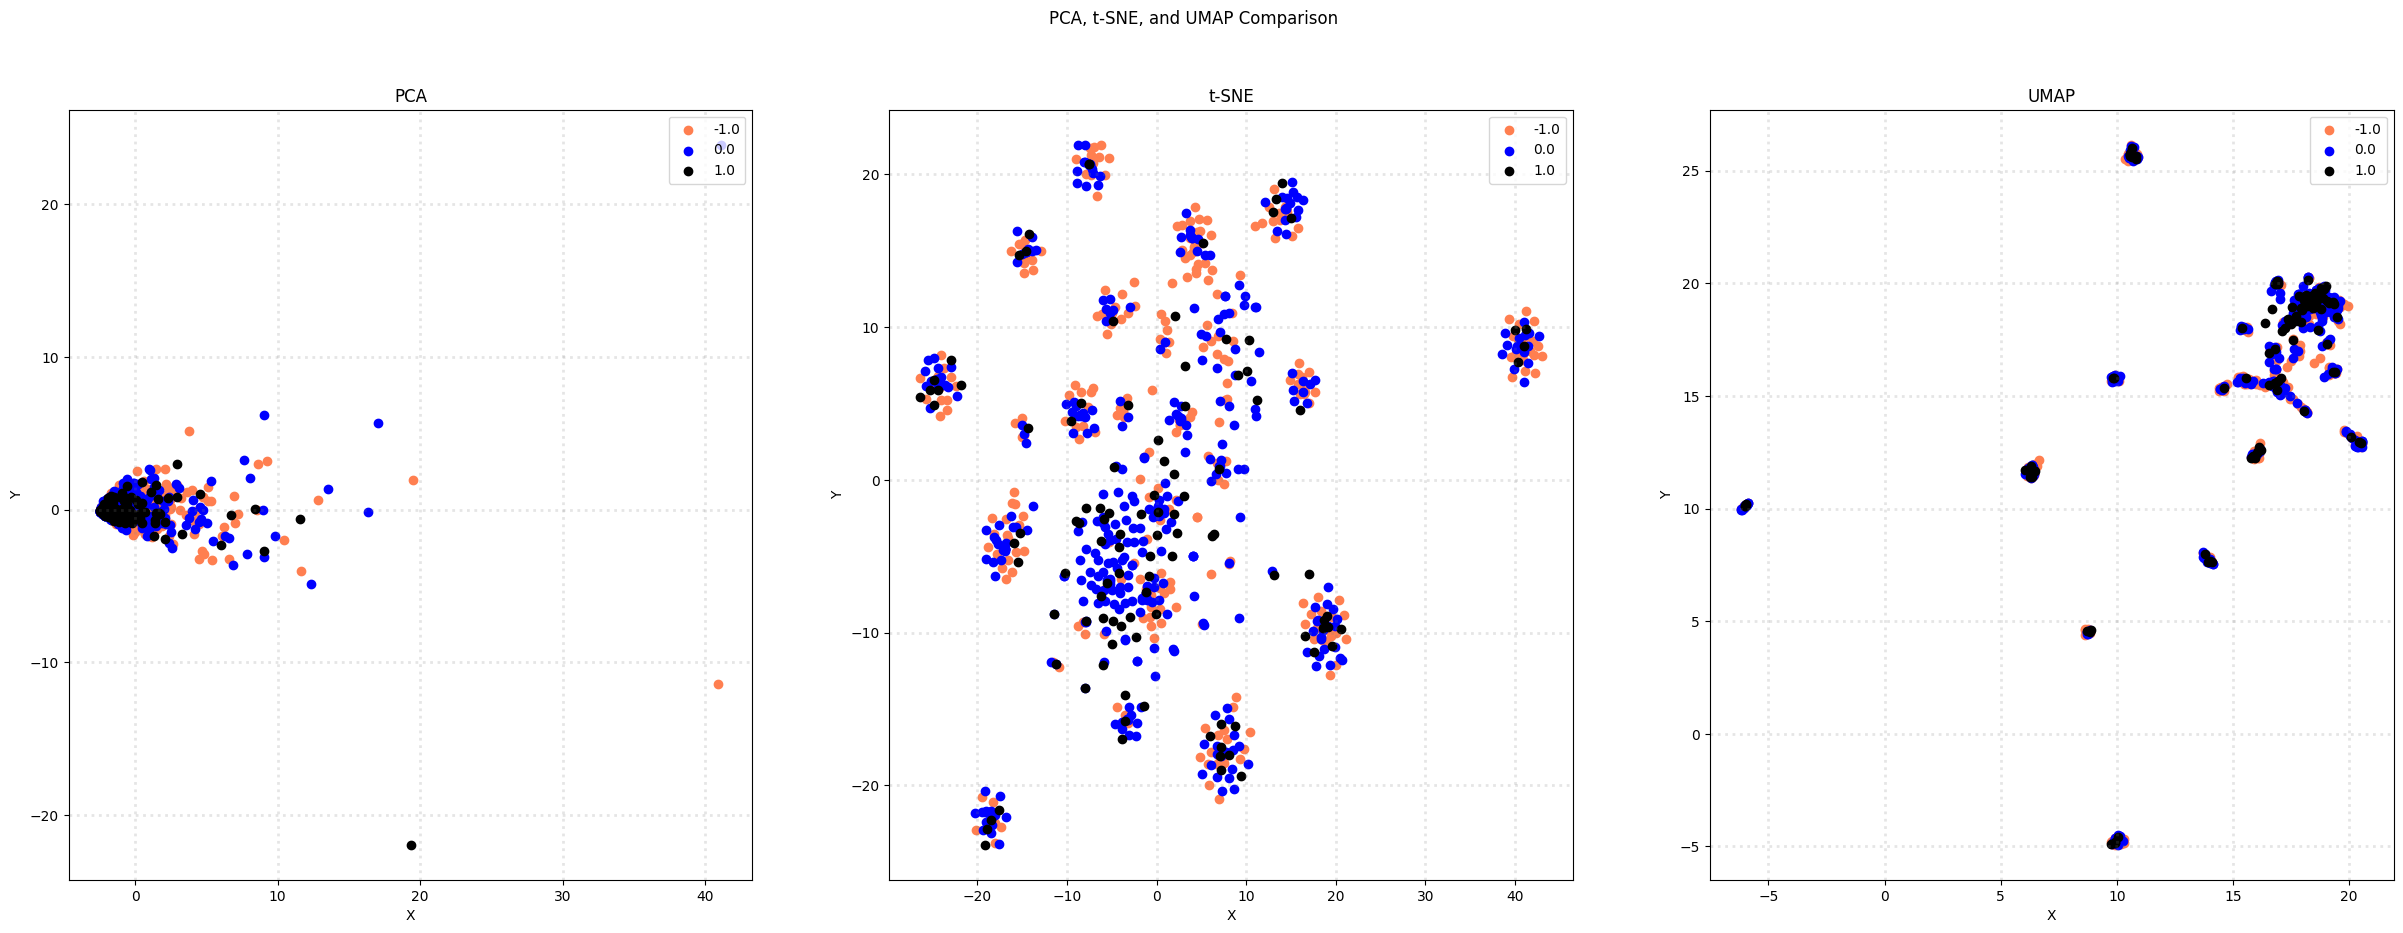

In [53]:
#Dimensionality Reduction
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

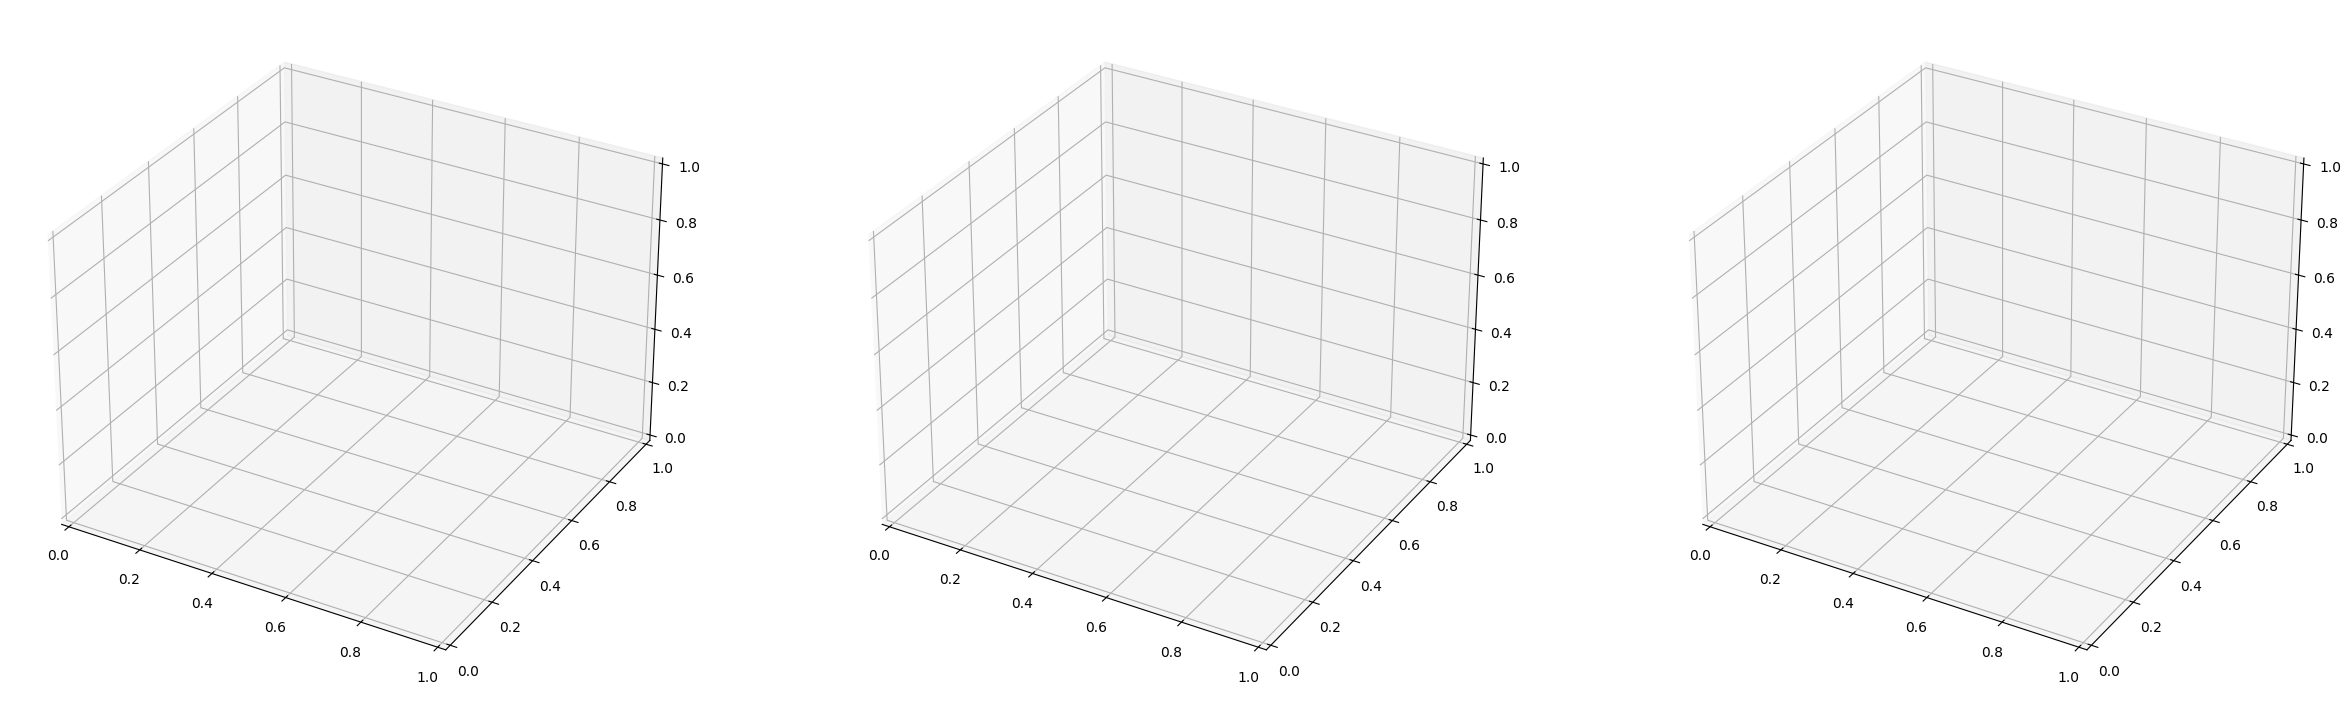

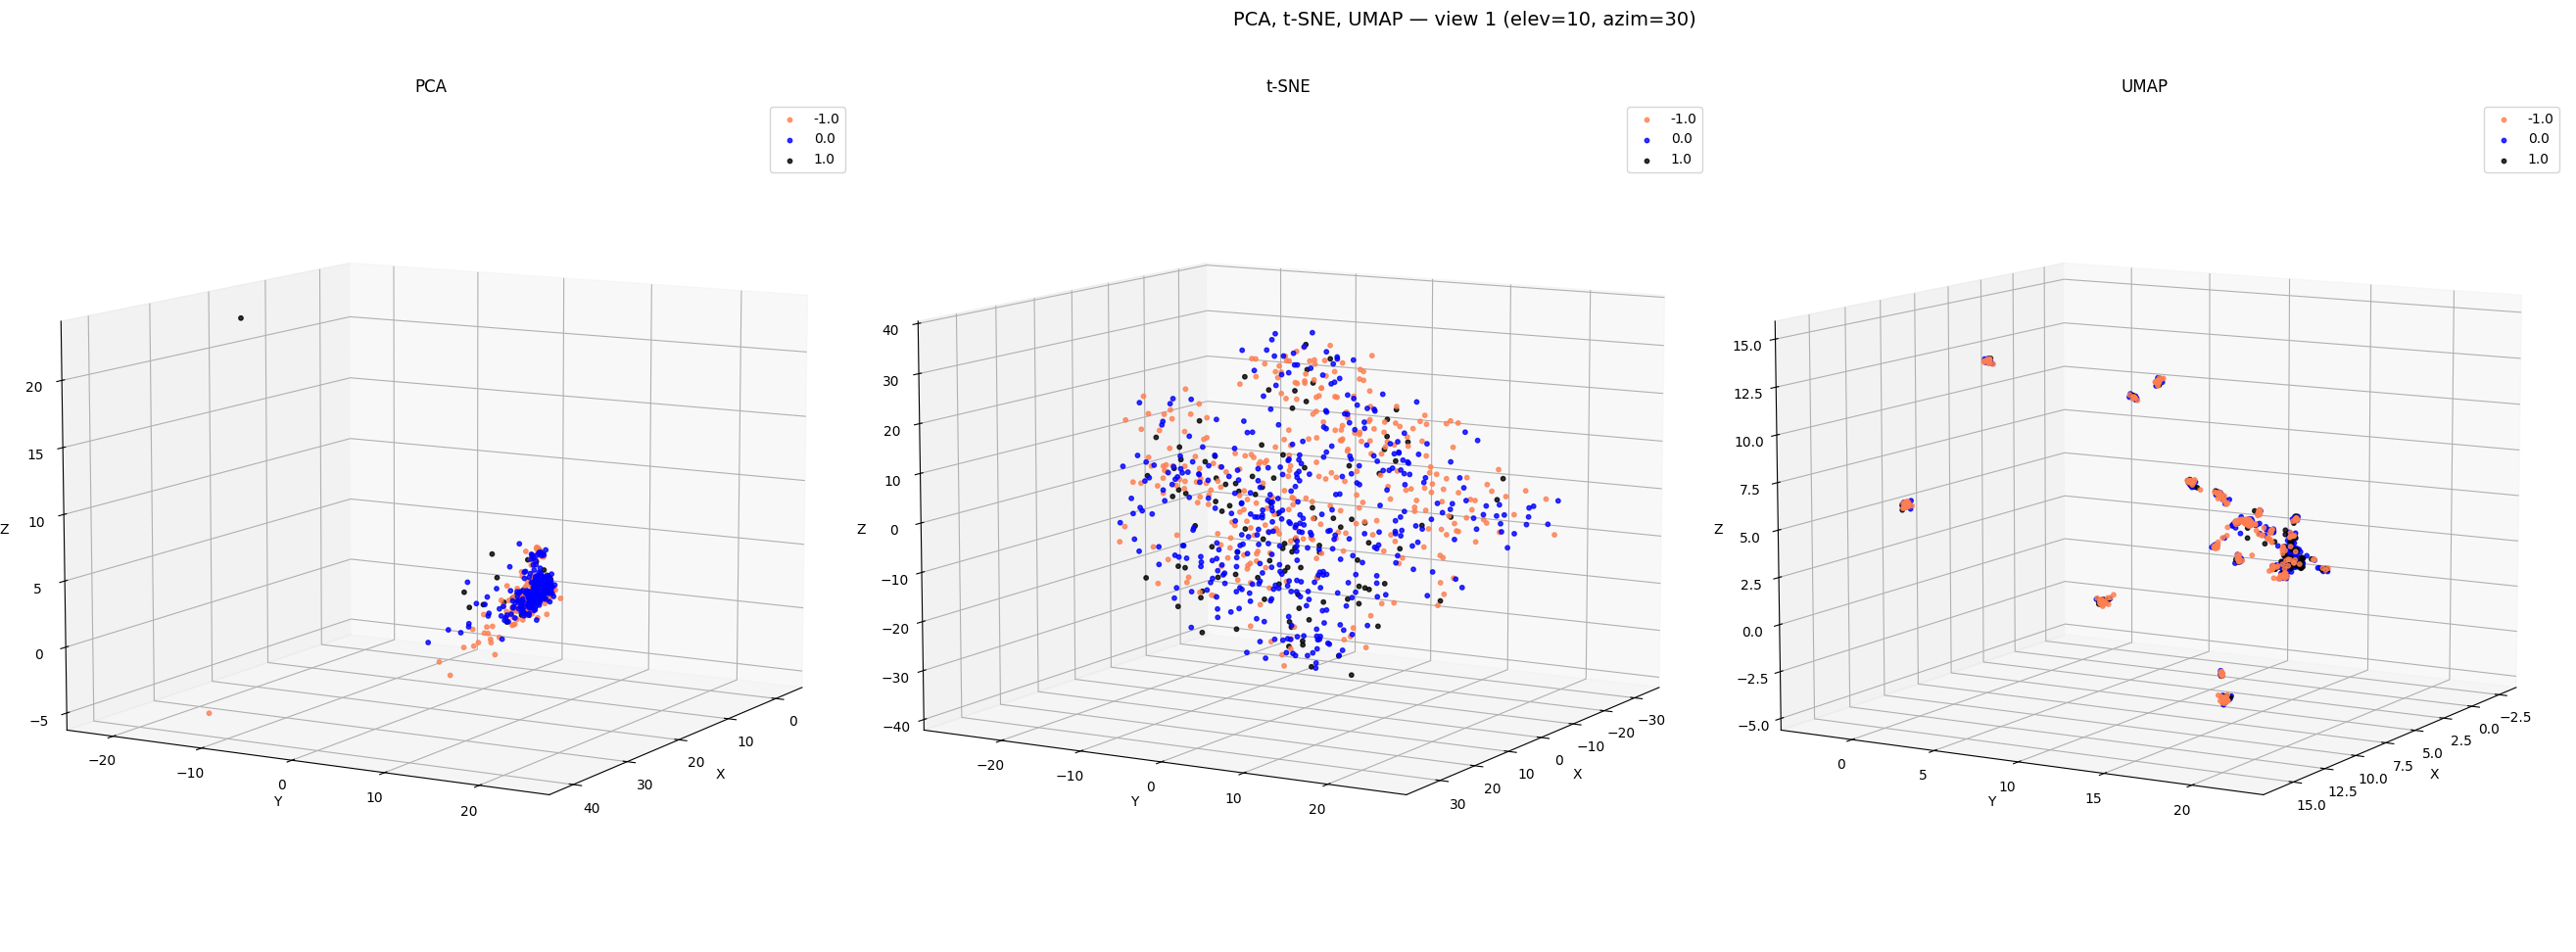

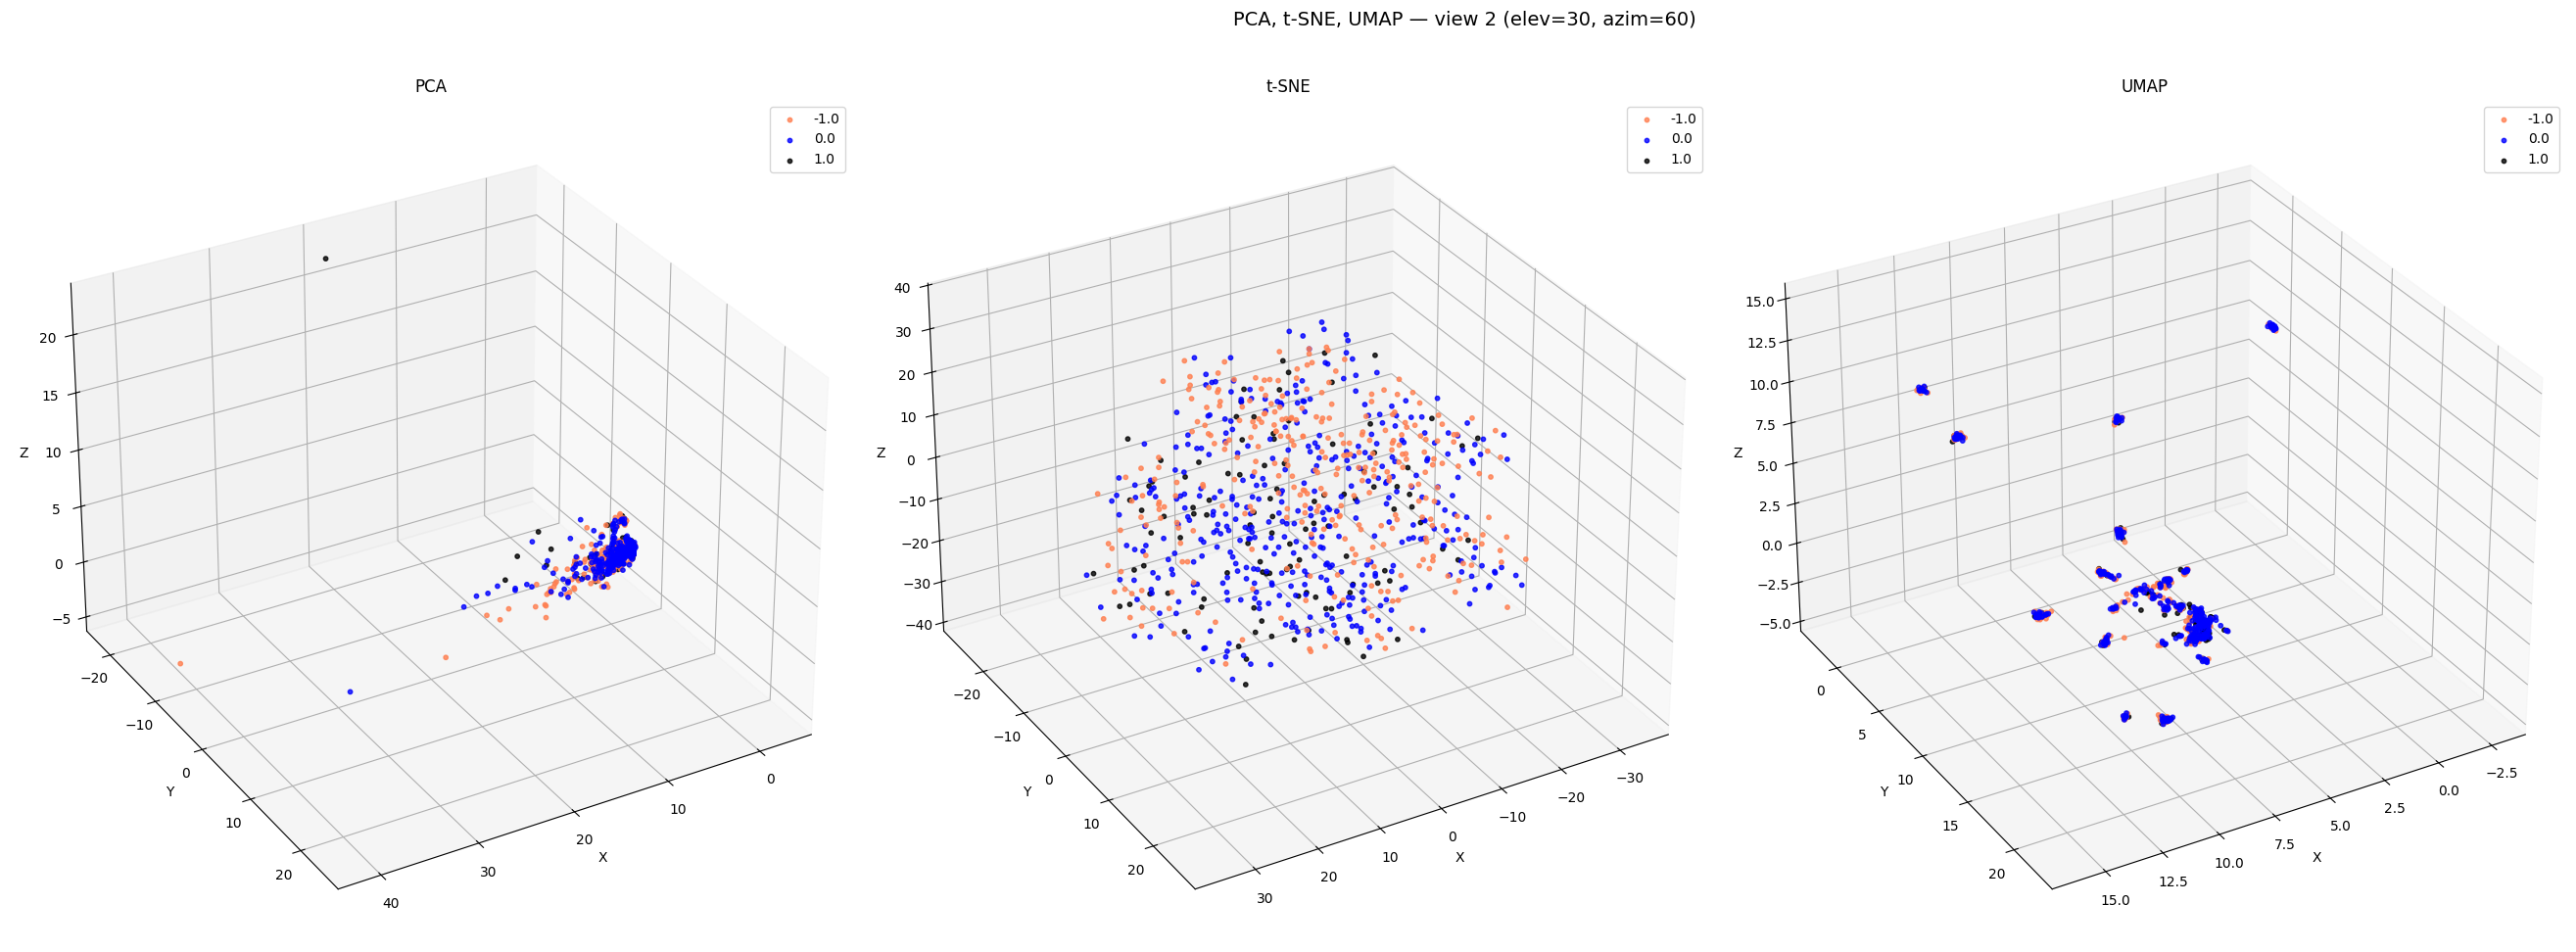

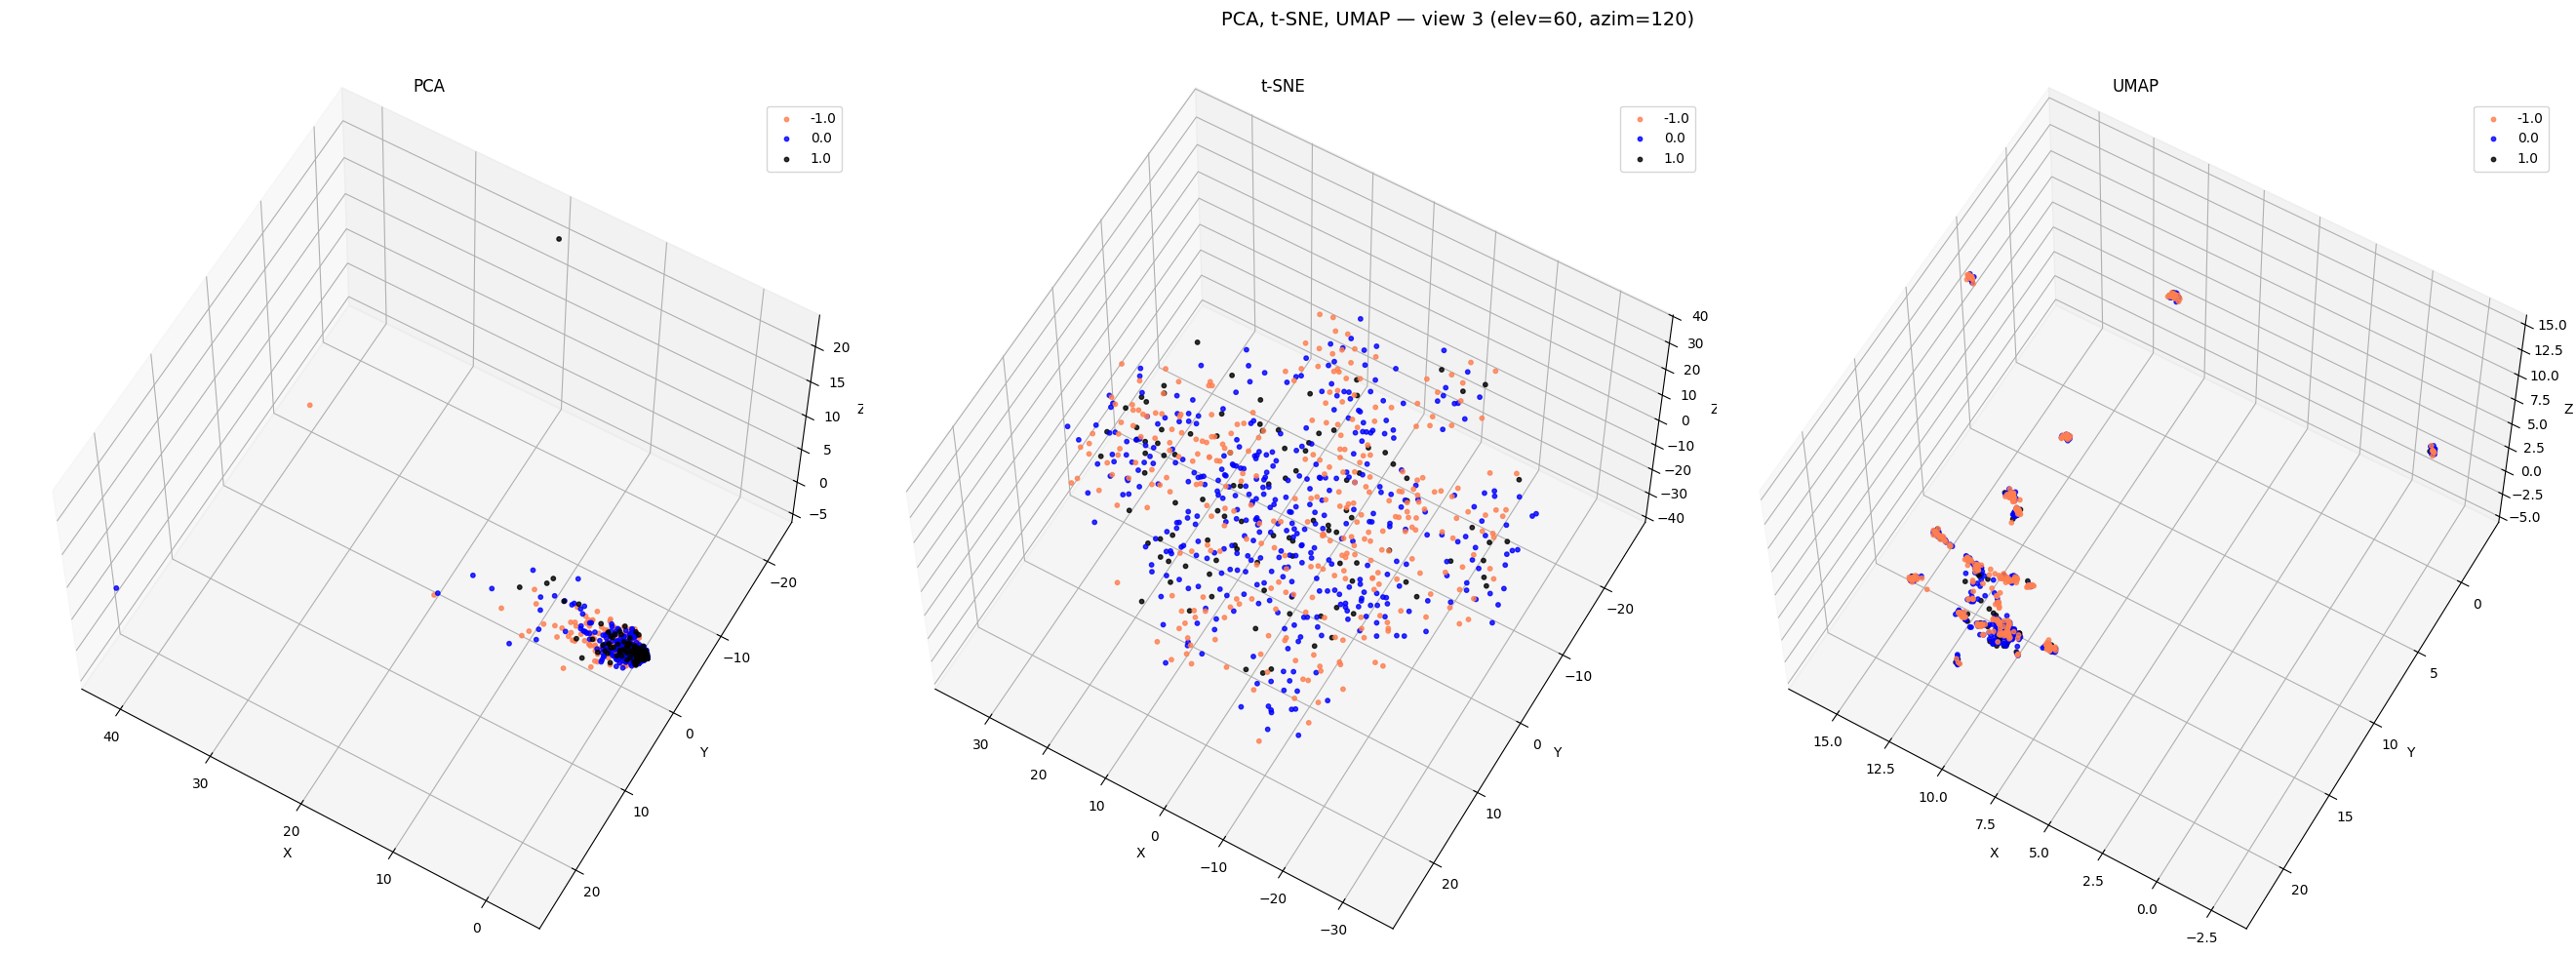

In [54]:
from mpl_toolkits.mplot3d import Axes3D

X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)


col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]           
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, s=10, alpha=0.8)

    ax.grid(color='gray', linestyle=':', linewidth=0.5, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')


view_angles = [(10, 30), (30, 60), (60, 120)]

for i, (elev, azim) in enumerate(view_angles):
    fig, axes = plt.subplots(1, 3, figsize=(30, 10), subplot_kw={'projection': '3d'})
    fig.suptitle(f'PCA, t-SNE, UMAP — view {i+1} (elev={elev}, azim={azim})', fontsize=14)

    plot_scatter(axes[0], X_pca_tdm, 'PCA')
    plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
    plot_scatter(axes[2], X_umap_tdm, 'UMAP')

    for ax in axes:
        ax.view_init(elev=elev, azim=azim)

    plt.tight_layout(rect=[0, 0, 0.88, 0.95])
    plt.show()

In [110]:
#Data Exploration
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[5]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[10]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[100]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})


Cosine Similarity using count bw 1 and 2: 0.167183
Cosine Similarity using count bw 1 and 3: 0.070491
Cosine Similarity using count bw 2 and 3: 0.045175
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\marsh\AppData\Local\Temp\ipykernel_19824\3633710370.py:40: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\marsh\AppData\Local\Temp\ipykernel_19824\3633710370.py:41: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\marsh\AppData\Local\Temp\ipykernel_19824\3633710370.py:42: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\marsh\AppData\Local\Temp\ipykernel_19824\3633710370.py:44: DeprecationWarning:

Conversion of an array with ndim > 0 t

In [121]:
#Model with only the document-term frequency data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score


# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy(tdm_df):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))

Accuracy(tdm_df): 0.5368852459016393

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5182    0.7320    0.6068        97
         0.0     0.5859    0.4793    0.5273       121
         1.0     0.2500    0.0769    0.1176        26

    accuracy                         0.5369       244
   macro avg     0.4514    0.4294    0.4173       244
weighted avg     0.5232    0.5369    0.5153       244



In [122]:
#Model with the document-term frequency data and the pattern matrix
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category_name'], test_size=0.3, random_state=42)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy(augmented_df):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))
    

Accuracy(augmented_df): 0.5450819672131147

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5344    0.7216    0.6140        97
         0.0     0.5794    0.5124    0.5439       121
         1.0     0.1667    0.0385    0.0625        26

    accuracy                         0.5451       244
   macro avg     0.4268    0.4242    0.4068       244
weighted avg     0.5175    0.5451    0.5205       244



In [123]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['category_name'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (tdf_df):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Accuracy (tdf_df): 0.4713114754098361

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.4476    0.4845    0.4653        97
         0.0     0.5372    0.5372    0.5372       121
         1.0     0.1667    0.1154    0.1364        26

    accuracy                         0.4713       244
   macro avg     0.3838    0.3790    0.3796       244
weighted avg     0.4621    0.4713    0.4659       244



In [124]:
#Decision Tree with the document-term frequency data and the pattern matrix
# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['category_name'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (augmented_df):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Accuracy (augmented_df): 0.48770491803278687

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.4519    0.4845    0.4677        97
         0.0     0.5520    0.5702    0.5610       121
         1.0     0.2000    0.1154    0.1463        26

    accuracy                         0.4877       244
   macro avg     0.4013    0.3901    0.3917       244
weighted avg     0.4747    0.4877    0.4797       244



In [ ]:
#模型評估
#Naive Bayes : augmented_df 比 tdm_df 準確率(accuracy)來的高，但在各類別的precision, recall, f1 的分數並不一定比較好
#Decision Tree :augmented_df 比 tdm_df 準確率(accuracy)來的高，且各類別的precision, recall, f1 的分數也比較好

In [134]:
####Third part#####

#feature : word frequency
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X['text'], X['category_name'], test_size=0.3, random_state=42
)

vectorizer = CountVectorizer(ngram_range=(1, 1))
vectorizer.fit(X_train)
vectorizer.fit(X_test)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Train the Naive Bayes classifier
nb_classifier_1 = MultinomialNB()
nb_classifier_1.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_classifier_1.predict(X_test_vectorized)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))


Accuracy: 0.5286885245901639

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5328    0.6701    0.5936        97
         0.0     0.5728    0.4876    0.5268       121
         1.0     0.2632    0.1923    0.2222        26

    accuracy                         0.5287       244
   macro avg     0.4563    0.4500    0.4475       244
weighted avg     0.5239    0.5287    0.5209       244



In [135]:
#feature : TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X['text'], X['category_name'], test_size=0.3, random_state=42
)

vectorizer = TfidfVectorizer()

vectorizer.fit(X_train)
vectorizer.fit(X_test)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Train the Naive Bayes classifier
nb_classifier_1 = MultinomialNB()
nb_classifier_1.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = nb_classifier_1.predict(X_test_vectorized)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred,digits=4))


Accuracy: 0.5409836065573771

Classification Report:
               precision    recall  f1-score   support

        -1.0     0.5152    0.5258    0.5204        97
         0.0     0.5586    0.6694    0.6090       121
         1.0     0.0000    0.0000    0.0000        26

    accuracy                         0.5410       244
   macro avg     0.3579    0.3984    0.3765       244
weighted avg     0.4818    0.5410    0.5089       244



c:\Users\marsh\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\marsh\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\marsh\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
##Fourth##
"""
在Lab 1 中，應該要在資料切分之後再做CountVectorize，這樣才能避免資料洩漏(data leakage)的問題。
"""